# Исследования рынка общепита в Москве для принятия решения об открытии нового заведения
Заказчики - инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не решили, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.

**Цель работы:** исследовать рынок Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.

В моём распоряжении датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

**План работы:**
- Шаг 1. Загрузить данные и изучить общую информацию;
- Шаг 2. Выполнить предобработку данных;
- Шаг 3. Провести анализ данных;
- Шаг 4. Изучить данные о кофейнях, выявить лучшие параметры для её открытия;
- Шаг 5. Подготовить отчёт в виде презентации.

# Рынок заведений общественного питания Москвы

### Шаг 1. Загрузить данные и изучить общую информацию

#### Импортирую необходимые библиотеки. Считаю данные из csv-файла в датафрейм и сохраню в переменную df.

In [58]:
# Загружаю необходимые библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from plotly import graph_objects as go 
import json
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster
import scipy.stats as stats
import warnings
warnings.simplefilter("ignore")

In [59]:
# Чтение файла:
df = pd.read_csv('/Users/sonchez/practicum/moscow_places.csv', sep=',')
df.head(5)

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


#### Выведу основную информацию о датасете с помощью метода info():

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


**Изучив общую информацию по датафрейму, видно:**
- представлена информация о 8406 заведениях Москвы; 
- больше половины столбцов содержит информацию строкового типа 'object', практически все остальные - вещественные числа 'float64', и лишь один столбец - целое число 'int64';
- необходимо заменить тип данных у столбца 'seats', так как он хранит информацию о количестве посадочных мест, а поскольку количество посадочных мест - всегда целое число, то тип 'float64' заменим на 'int64';
- изменять названия столбцов не требуется;
- есть пропущенные значения NaN.

### Предобработка данных

#### Проверю данные на наличие дубликатов:

In [61]:
# Проверка на наличие явных дубликатов:
df.duplicated().sum()

0

Видно, что явных дубликатов не найдено. 

Необходимо теперь выяснить, есть ли неявные дубликаты:

In [62]:
# Приведу столбец с названиями 'name' и адрессами 'address' к нижнему регистру:
df['name'] = df['name'].str.lower()
df['address'] = df['address'].str.lower()
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [63]:
# Проведу проверку на дубликаты, основываясь на столбцах 'name' и 'address':
columns_to_check = ['name', 'address']
df[df.duplicated(subset=columns_to_check, keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
189,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 09:00–23:00",55.880327,37.530786,3.2,NaN,NaN,NaN,NaN,0,NaN
215,кафе,кафе,"москва, парк ангарские пруды",Северный административный округ,"ежедневно, 10:00–22:00",55.881438,37.531848,3.2,NaN,NaN,NaN,NaN,0,NaN
1430,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"москва, волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2211,раковарня клешни и хвосты,ресторан,"москва, проспект мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0
2420,раковарня клешни и хвосты,"бар,паб","москва, проспект мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3091,хлеб да выпечка,булочная,"москва, ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"москва, ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


In [64]:
# Удалю неявные дубликаты:
df.duplicated(subset=['name', 'address']).count()
print(len(df))
df = df.drop_duplicates(subset=['name', 'address'])
print(len(df))

8406
8402


Удалила неявные дубликаты.

Посмотрю теперь, сколько всего представлено заведений:

In [65]:
print('Количество заведений:', df['name'].nunique())

Количество заведений: 5512


Проверю на наличие неявных дубликатов столбцы с категориями заведений 'category':

In [66]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Проверю, сколько уникальных значений в столбце с районом 'district':

In [67]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

Неявных дубликатов в этих столбцах не обнаружено.

#### Проверю данные на наличие пропусков:

In [68]:
# Выведу пропуски в каждом столбце в порядке возрастания их количества
df.isna().sum().sort_values()

name                    0
category                0
address                 0
district                0
lat                     0
lng                     0
rating                  0
chain                   0
hours                 535
seats                3610
avg_bill             4586
price                5087
middle_avg_bill      5253
middle_coffee_cup    7867
dtype: int64

Видно пропуски в столбцах 'hours', 'price', 'avg_bill', 'middle_avg_bill', 'middle_coffee_cup', 'seats'. Посмотрю на долю пропусков, и в дальнейшем, на основании этого, приму решение об удалении, замене либо игнорировании пропусков:

In [69]:
pd.DataFrame(round(df.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
name,0.000000
category,0.000000
address,0.000000
district,0.000000
hours,6.400000
lat,0.000000
lng,0.000000
rating,0.000000
price,60.500000
avg_bill,54.600000


Пропусков в данных очень много, больше всего в столбцах с ценовым сегментом, меньше в столбце с временем работы. Просто удалить не получится, будут искажения в исследовании. Для дальнейшего исследования мне понадобятся столбцы 'middle_avg_bill' и 'middle_coffee_cup'. Значения для этих столбцов берутся из 'avg_bill'. Посмотрю, как можно заполнить пропуски:

In [70]:
# Проверю пропуски в столбце 'middle_avg_bill', которые можно восстановить из столбца 'avg_bill'
df[(df['avg_bill'].isna()==False)&(df['avg_bill'].str.contains(r'\Средний счёт'))&
                                                           (df['middle_avg_bill'].isna()==True)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


Видно, что если не заполнено поле из столбца 'avg_bill', то в столбец 'middle_avg_bill' не возможно заполнить. То же самое для столбца с ценой одной чашки капучино:

In [71]:
# Проверю пропуски в столбце 'middle_coffee_cup', которые можно восстановить из столбца 'avg_bill'
df[(df['avg_bill'].isna()==False)&(df['avg_bill'].str.contains(r'\Цена одной чашки капучино'))&
                                                           (df['middle_coffee_cup'].isna()==True)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats


Можно сказать, что причина появления пропусков в столбцах 'middle_avg_bill' и 'middle_coffee_cup' неслучайна, эти пропущенные значения связаны с данными в столбце 'avg_bill'. 

Также я считаю, что заполнять эти столбцы, например, средними или медианными значениями, отталкиваясь от названия заведения, неправильно, так как количество мест в сетевых заведениях, в разных районах, может отличаться. Также в мелких сетях, по условию, могут быть ошибки. Оставлю пропуски как есть.

#### Проверю данные на наличие выбросов:

Проверю на наличие выбросов столбец со средним чеком в заведениях:

In [72]:
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

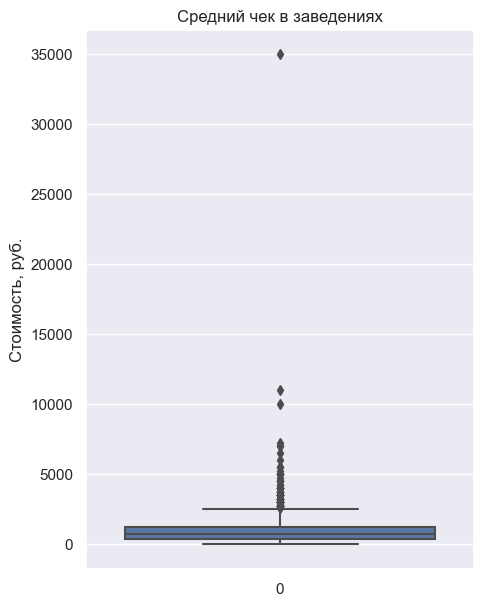

In [73]:
# Визуализирую, для этого построим график "ящик с усами":
sns.set(rc={'figure.figsize':(5,7)})
plt.title('Средний чек в заведениях')
plt.ylabel('Стоимость, руб.')
sns.boxplot(data = df['middle_avg_bill'])
plt.show()

Можно заметить, что есть явная граница выбросов по значению среднего чека, она находится за отметкой в 3000 рублей. 
Необходимо посмотреть, что это за заведения в Москве с таким большим средним чеком:

In [74]:
df[df['middle_avg_bill']>3000]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
317,vоdный,ресторан,"москва, ленинградское шоссе, 39, стр. 6",Северный административный округ,"ежедневно, 12:00–00:00",55.834978,37.479791,4.7,высокие,Средний счёт:4500–5500 ₽,5000.0,NaN,0,286.0
354,стар самарканд,ресторан,"москва, ленинградское шоссе, 84, стр. 1",Северный административный округ,"ежедневно, 07:00–02:00",55.848269,37.475768,4.4,высокие,Средний счёт:1500–5000 ₽,3250.0,NaN,0,84.0
730,чойхона,"бар,паб","москва, дмитровское шоссе, 95а",Северный административный округ,"ежедневно, 10:00–23:00",55.871497,37.543555,4.4,высокие,Средний счёт:5000–17000 ₽,11000.0,NaN,0,49.0
754,золотая роща,ресторан,"москва, улица бестужевых, 14, корп. 1",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.871153,37.609928,4.3,высокие,Средний счёт:3500–4000 ₽,3750.0,NaN,0,300.0
1125,на мангале,кафе,"москва, проспект мира, 119, стр. 503",Северо-Восточный административный округ,"ежедневно, 10:00–21:00",55.830405,37.617687,1.0,высокие,Средний счёт:4000–5000 ₽,4500.0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5724,garum,ресторан,"москва, мичуринский проспект, 16",Западный административный округ,"пн-пт 15:00–01:00; сб,вс 13:00–23:00",55.702328,37.505930,4.5,высокие,Средний счёт:2000–5000 ₽,3500.0,NaN,0,60.0
5978,буйабес,ресторан,"москва, ленинский проспект, 37",Южный административный округ,"ежедневно, 12:00–23:00",55.711015,37.586544,4.2,высокие,Средний счёт:от 3500 ₽,3500.0,NaN,0,96.0
6349,дудук,ресторан,"москва, улица симоновский вал, 26, корп. 2",Южный административный округ,"ежедневно, 11:00–23:00",55.718072,37.661702,4.6,высокие,Средний счёт:2500–4500 ₽,3500.0,NaN,0,130.0
7177,кафе,ресторан,"москва, каширское шоссе, 23, стр. 2",Южный административный округ,"ежедневно, круглосуточно",55.657450,37.646665,4.1,высокие,Средний счёт:20000–50000 ₽,35000.0,NaN,0,100.0


In [75]:
df[df['middle_avg_bill'] > 3000]['name'].count()

61

61 заведение с выбросами по среднему чеку, можно исключить эти строки из датасета:

In [76]:
# Удалю из датасета строки с выбросами:
df = df.drop(df[df['middle_avg_bill'] > 3000].index)
df[df['middle_avg_bill'] > 3000]['name'].count()

0

Посмотрю ещё раз на распределение среднего чека при помощи графика:

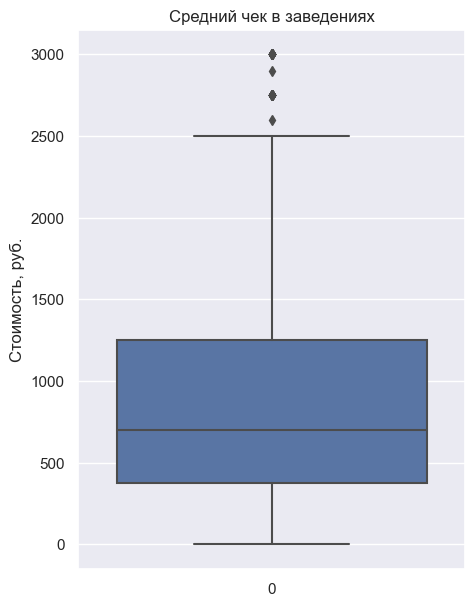

In [77]:
sns.set(rc={'figure.figsize':(5,7)})
plt.title('Средний чек в заведениях')
plt.ylabel('Стоимость, руб.')
sns.boxplot(data = df['middle_avg_bill'])
plt.show()

Видно также, что есть средний чек стоимостью 0 рублей, необходимо удалить такие строки, так как это является ошибкой в данных:

In [78]:
# Удалю строку с заведением, в котором средний чек равен 0:
df = df.drop(df[df['middle_avg_bill'] == 0].index)
df[df['middle_avg_bill'] == 0]['name'].count()

0

In [79]:
df['middle_avg_bill'].describe()

count    3087.000000
mean      880.615808
std       619.825727
min        30.000000
25%       375.000000
50%       700.000000
75%      1250.000000
max      3000.000000
Name: middle_avg_bill, dtype: float64

Теперь данные по среднему чеку выглядят адекватно.

Проверю также на наличие выбросов столбец со стоимостью чашки капучино в заведениях:

In [80]:
df['middle_coffee_cup'].describe()

count     535.000000
mean      174.721495
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

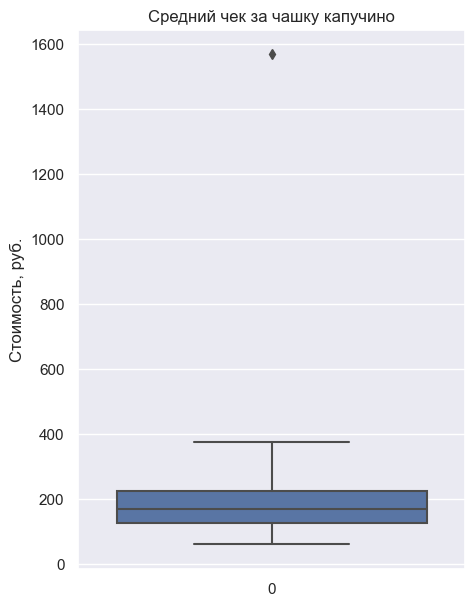

In [81]:
# Визуализирую, для этого построим график "ящик с усами":
sns.set(rc={'figure.figsize':(5,7)})
plt.title('Средний чек за чашку капучино')
plt.ylabel('Стоимость, руб.')
sns.boxplot(data = df['middle_coffee_cup'])
plt.show()

Граница аномального значения установилась на отметке в 400 рублей. Сразу видно необычную стоимость за чашку капучино, хоть я и рассматриваю заведения Москвы, но стоит обратить внимание на число 1568 рублей. Посмотрю, какое заведение продаёт данное кофе:

In [82]:
df[df['middle_coffee_cup']>1500]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
2859,шоколадница,кофейня,"москва, большая семёновская улица, 27, корп. 1",Восточный административный округ,"ежедневно, 08:00–23:00",55.782268,37.709022,4.2,средние,Цена чашки капучино:230–2907 ₽,NaN,1568.0,1,48.0


Всего одно заведение, можно посмотреть на цену чашки капучино: 230-2907 рублей, очень странная цена - 2907 рублей. Скорее всего это опечатка, исправим её:

In [83]:
# Исправлю значения в столбцах avg_bill и middle_coffee_cup для этой строки:
df.at[2859, 'avg_bill'] = 'Цена чашки капучино:230–290 ₽'
df.at[2859, 'middle_coffee_cup'] = 260

Теперь проверю на наличие выбросов столбец с количеством посадочных мест в заведениях:

In [84]:
df['seats'].describe()

count    4748.000000
mean      107.974094
std       122.185493
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

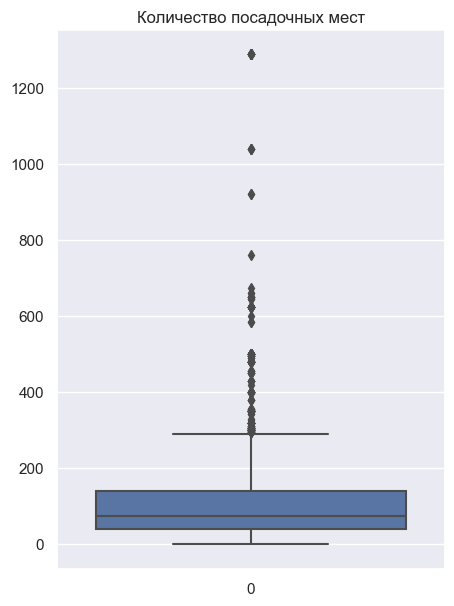

In [85]:
# Визуализирую, для этого построим график "ящик с усами":
sns.set(rc={'figure.figsize':(5,7)})
plt.title('Количество посадочных мест')
sns.boxplot(data = df['seats'])
plt.show()

Видно на графике, что есть достаточно большое число выбросов. Граница допустимых значений - 300 посадочных мест, далее идут выбросы. 

Посмотрю информацию о заведениях, в которых число посадочных мест превышает это значение:

In [86]:
df[df['seats']>300]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
127,арарат,кафе,"москва, дмитровское шоссе, 165, корп. 1",Северо-Восточный административный округ,"ежедневно, 06:00–20:00",55.914310,37.538953,4.2,NaN,NaN,NaN,NaN,1,350.0
171,one price coffee,кофейня,"москва, дмитровское шоссе, 163а, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.909838,37.541526,4.0,NaN,NaN,NaN,NaN,1,350.0
176,вуди пицца,пиццерия,"москва, дмитровское шоссе, 107а, корп. 1",Северный административный округ,"пн-пт 08:00–21:00; сб,вс 09:00–21:00",55.878504,37.540110,4.0,средние,Средний счёт:400–600 ₽,500.0,NaN,0,350.0
194,ленкорань,кафе,"москва, дмитровское шоссе, 165, корп. 1",Северо-Восточный административный округ,"ежедневно, 06:00–20:00",55.914574,37.539103,1.4,NaN,NaN,NaN,NaN,0,350.0
216,грузинский бульвар,быстрое питание,"москва, дмитровское шоссе, 163а, корп. 1",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.909115,37.540112,4.0,NaN,NaN,NaN,NaN,0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8171,монстер хиллс,ресторан,"москва, автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–22:00",55.705457,37.638930,4.0,средние,Средний счёт:600–1200 ₽,900.0,NaN,0,455.0
8198,милти,быстрое питание,"москва, улица ленинская слобода, 19",Южный административный округ,пн-пт 09:00–19:00,55.708303,37.652822,3.8,NaN,NaN,NaN,NaN,0,450.0
8237,pasta cup & pinsa,пиццерия,"москва, автозаводская улица, 18",Южный административный округ,"ежедневно, 10:00–22:00",55.704647,37.639556,3.5,средние,Средний счёт:450–700 ₽,575.0,NaN,0,455.0
8315,чайхана бишкек,ресторан,"москва, тихорецкий бульвар, 2, корп. 1",Юго-Восточный административный округ,"ежедневно, 09:00–01:30",55.679190,37.776553,4.1,NaN,NaN,NaN,NaN,0,305.0


In [87]:
df[df['seats'] > 300]['name'].count()

250

В датасете 250 строк дынных с аномальными значениями по количеству посадочных мест, поэтому будет разумно оставить эти данные, чтобы не изменить важные показатели.

#### Создам дополнительный столбец 'street' с названиями улиц из столбца с адресом:

In [88]:
# Создам столбец 'street' с названиями улиц из столбца с адресом:
df['street'] = df['address'].str.split(', ').str[1]

#### Создам столбец 'is_24_7' с обозначением, что заведение работает ежедневно и круглосуточно (24/7):

In [89]:
# Логическое значение True — если заведение работает ежедневно и круглосуточно;
# Логическое значение False — в противоположном случае:
df['is_24_7'] = df['hours'].apply(lambda x: True if x == 'ежедневно, круглосуточно' else False)
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24_7
0,wowфли,кафе,"москва, улица дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN,улица дыбенко,False
1,четыре комнаты,ресторан,"москва, улица дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0,улица дыбенко,False
2,хазри,кафе,"москва, клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0,клязьминская улица,False
3,dormouse coffee shop,кофейня,"москва, улица маршала федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица маршала федоренко,False
4,иль марко,пиццерия,"москва, правобережная улица, 1б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0,правобережная улица,False


**Выполнив предобработку данных, можно сделать вывод:**
- явные дубликаты отсутствуют;
- удалила неявные дубликаты, основываясь на столбцах 'name' и 'address';
- в столбцах с категориями заведений и районами неявных дубликатов не обнаружено;
- представлено всего 5512 заведений, 
- тип данных соответствует значениям, изменять название столбцов не требуется;
- пропуски в столбцах 'middle_avg_bill' и 'middle_coffee_cup' неслучайны, эти пропущенные значения связаны с данными в столбце 'avg_bill'. Оставила пропуски как есть, так как невозможно подобрать необходимые значения на замену;
- проверила данные на наличие выбросов:
    - увидела, что есть 61 заведение с выбросами по среднему чеку, исключила эти строки из датасета;
    - также заметила, что есть заведения, средний чек которых стоимостью 0 рублей, удалила такие строки, так как это является ошибкой в данных;
    - в столбце со значением стоимости чашки капучино я нашла всего заведение с аномальным значением, пришла к выводу, что это опечатка (стоимостью чашки капучино была равна 2907 рублей), исправила значения в столбцах avg_bill и middle_coffee_cup для этой строки с выбросом; 
    - обнаружила выбросы в значениях по количеству посадочных мест, их в датасете 250, поэтому я приняла решение  оставить эти данные, чтобы не изменить важные показатели;
- создала два новых столбца 'street' и 'is_24_7', которые обозначают отдельно названия улиц и работу заведения (круглосуточно или нет) соответственно.

### Проведу анализ данных

#### Посмотрю ещё раз, какие категории заведений представленны в данных:

In [90]:
# Выведу на экран уникальные значения из столбца 'category': 
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

In [91]:
# Посчитаю количество заведений для каждой категории:
category_counts = df.groupby('category')['name'].count().reset_index().sort_values(by='name')
category_counts['ratio'] = category_counts['name'] / category_counts['name'].sum() * 100
category_counts

,category,name,ratio
1,булочная,256,3.069544
7,столовая,314,3.764988
2,быстрое питание,601,7.206235
5,пиццерия,633,7.589928
0,"бар,паб",754,9.040767
4,кофейня,1412,16.930456
6,ресторан,1997,23.944844
3,кафе,2373,28.453237


Построю визуализацию того, как распределены заведения по категориям:

In [92]:
x_axis_label = 'Категория заведения' 
y_axis_label = 'Колтчество' 

fig = px.bar(category_counts, 
             x='category', 
             y='name',
             color='category', 
             title='Распределение количества заведений по категориям',
             text=round(category_counts['ratio'], 2),
             labels={'category': x_axis_label, 'name': y_axis_label})
fig.show()

По столбчатой диаграмме видно, что больше всего в Москве таких заведений, как кафе (28%) и рестораны (24%), чуть меньше кофеен (примерно 17%), далее следуют бары и пабы (9%), пиццерии (примерно 8%) и заведения быстрого питания (примерно 7%), меньше всего столовых (примерно 4%) и булочных (3% от общего числа заведений).

#### Исследую количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее:

Чтобы понять как распределены посадночные места для категорий всех заведений, посмотрю медианные значения посадочных мест для той или иной категории заведения.

In [93]:
# Посчитаю медианное количество посадочных мест в различных категориях заведений:
category_seats_median = df.pivot_table(index = 'category', values = 'seats', aggfunc = 'median').sort_values(by='seats')
category_seats_median = category_seats_median.reset_index()
category_seats_median

,category,seats
0,булочная,50.0
1,пиццерия,55.0
2,кафе,60.0
3,быстрое питание,67.0
4,столовая,75.0
5,кофейня,80.0
6,"бар,паб",82.0
7,ресторан,85.0


Визуализирую данную таблицу в виде столбчатой диаграммы:

In [94]:
# Изменение названий осей
x_axis_label = 'Категория заведения' 
y_axis_label = 'Количество посадочных мест' 

# Создание графика
fig = px.bar(category_seats_median, x = 'category', y = 'seats', color='category',
             title='Медианное количество посадочных мест по категориям заведений',
             labels={'category': x_axis_label, 'seats': y_axis_label})
fig.show()

**Вывод:** по графику видно, что больше всего посадочных мест в ресторанах, барах и кофейнях. Это можно легко объяснить: в ресторанах люди достаточно много проводят времени, поэтому необходимо достаточно большое количество посадочных мест, чтобы принять как можно больше посетителей, в барах и пабах такая же схема, в кафе люди могут часами наслаждаться вкусным кофе и разговаривать. Далее идут столовые и заведения быстрого питания, в таких местах люди обычно надолго не задерживаются, даже название "быстрое питание" говорит о том, что еда готовиться быстро, а посетители спешат с работы на обед, а потом обратно. Кафе, пиццерии и булочные также обладают меньшим количеством мест для своих гостей. Пиццерия работает чаще с доставкой еды, в булочную люди заходят, чтобы купить хлеб и другую выпечку, в кафе люди обычно перекусывают во время перерывов, поэтому такие заведения не нуждаются в большом количестве посадочных мест.

#### Рассмотрю и изображу соотношение сетевых и несетевых заведений в датасете:

In [95]:
# Рассчитаю количество сетевых и несетевых заведений в датасете:
print('Количество сетевых заведений:', df[df['chain']==1]['name'].count())
print('Количество несетевых заведений:', df[df['chain']==0]['name'].count())

Количество сетевых заведений: 3197
Количество несетевых заведений: 5143


In [96]:
chain = df.groupby('chain')['name'].count().reset_index()
chain.loc[chain['chain'] == 0, 'chain'] = 'Несетевые'
chain.loc[chain['chain'] == 1, 'chain'] = 'Cетевые'
chain

,chain,name
0,Несетевые,5143
1,Cетевые,3197


In [97]:
# Изображу соотношение на круговой диаграмме:
fig = px.pie(chain, values='name', names='chain', 
             title='Круговая диаграмма соотношения сетевых и несетевых заведений', 
             color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.show()

**Вывод:** по круговой диаграмме видно, что большинство заведений в Москве являются несетевыми (61,7%), их гораздо больше по сравнению с сетевыми (38,3%).

#### Исследую данные, чтобы понять какие категории заведений чаще являются сетевыми:

In [98]:
# Создам таблицу, в которой отразим количество сетевых и несетевых заведений по категориям:
category_chain = df.pivot_table(index = 'category', columns = 'chain', values = 'name', aggfunc = 'count')
category_chain.columns = ['non_chain', 'chain']

# Рассчитаю доли сетевых и несетевых заведений по категориям:
category_chain ['chain_rate'] = category_chain ['chain'] / (category_chain ['non_chain']
                                                            + category_chain ['chain']) * 100
category_chain ['non_chain_rate'] = category_chain ['non_chain'] / (category_chain ['non_chain']
                                                                    + category_chain ['chain']) * 100
category_chain = category_chain.drop (columns = ['non_chain', 'chain'])
category_chain.columns = ['Сетевые', 'Несетевые']
category_chain = category_chain.sort_values (by='Сетевые')
category_chain

,Сетевые,Несетевые
category,,
"бар,паб",22.148541,77.851459
столовая,28.025478,71.974522
кафе,32.827644,67.172356
ресторан,36.404607,63.595393
быстрое питание,38.269551,61.730449
кофейня,50.920680,49.079320
пиццерия,52.132701,47.867299
булочная,61.328125,38.671875


Построю интерактивный столбчатый график, чтобы посмотреть на соотношение сетевых и не сетевых заведений:

In [99]:
# Подписи для столбчатого графика
categories = category_chain.index
chain_rates = category_chain['Сетевые']
non_chain_rates = category_chain['Несетевые']

trace_chain = go.Bar(x=categories, y=chain_rates, name='Сетевые', marker=dict(color='#e4bd0b'))
trace_non_chain = go.Bar(x=categories, y=non_chain_rates, name='Несетевые', marker=dict(color='#00b8b8'))

# Барплот с накоплением:
layout = go.Layout(
    title='Соотношение сетевых и несетевых заведений по категориям',
    xaxis=dict(title='Категория'),
    yaxis=dict(title='Доля заведений (%)'),
    barmode='relative' 
)

fig = go.Figure(data=[trace_chain, trace_non_chain], layout=layout)
fig.show()

**Вывод:** на графике видно, что большая часть категорий заведений являются несетевыми. Но можно выделить, что для булочных, пиццерий и кофеен ситуация обратная: сетевых заведений больше, чем несетевых (61% для булочных, 52% для пиццерий и почти 51% для кофеен). Самый низкий процент сетевых заведений у баров и пабов - чуть больше 20%.

#### Сгруппирую данные по названиям заведений и найдём топ-15 популярных сетей в Москве.

Под популярностью понимается количество заведений этой сети в регионе.

In [100]:
# Найду топ-15 самых популярных сетей:
top15_chain = df[df['chain'] == 1].groupby('name').agg({'category' : pd.Series.mode, 'district' : 'count'})
top15_chain = top15_chain.rename(columns={'district':'count'})
top15_chain = top15_chain.sort_values('count', ascending = False).reset_index().head(15)
top15_chain

,name,category,count
0,шоколадница,кофейня,120
1,домино'с пицца,пиццерия,76
2,додо пицца,пиццерия,74
3,one price coffee,кофейня,71
4,яндекс лавка,ресторан,69
5,cofix,кофейня,65
6,prime,ресторан,50
7,хинкальная,кафе,44
8,кофепорт,кофейня,42
9,кулинарная лавка братьев караваевых,кафе,39


In [101]:
print('Всего заведений входит в топ 15 сетевых заведений Москвы:', top15_chain['count'].sum())

Всего заведений входит в топ 15 сетевых заведений Москвы: 816


Построю подходящую для такой информации визуализацию:

In [102]:
y_axis_label = 'Названия сетевых заведений'
x_axis_label = 'Количество заведений'

# Создам интерактивный график
fig = px.bar(top15_chain, y='name', x='count', color='category', orientation='h',
             title='Топ 15 сетевых заведений Москвы',
             labels={'name': y_axis_label, 'count': x_axis_label})
fig.show()

Посмотрю, есть ли какой-то признак, который объединяет эти сетевые заведения:

In [103]:
# Создам таблицу районов заведений, которые входят в топ 15 сетевых:
top15_count = df[df['name'].isin(top15_chain['name'])].groupby(['district']).agg({'name' : 'count'})
top15_count = top15_count.rename(columns={'name':'count'})
top15_count = top15_count.sort_values('count', ascending = False).reset_index()
top15_count

,district,count
0,Центральный административный округ,215
1,Южный административный округ,89
2,Западный административный округ,88
3,Северный административный округ,88
4,Северо-Восточный административный округ,85
5,Восточный административный округ,81
6,Юго-Западный административный округ,70
7,Юго-Восточный административный округ,56
8,Северо-Западный административный округ,46


In [104]:
# Изменю названия осей:
x_axis_label = 'Названия административных районов'
y_axis_label = 'Количество заведений из топ 15'

# Создам интерактивный график
fig = px.bar(top15_count, y='district', x='count', orientation='h',
             title='Распределение заведений из топ 15 по районам Москвы',
             labels={'district': x_axis_label, 'count': y_axis_label})

fig.update_layout(width=1000, height=700)

fig.show()

**Вывод:** по графику "Топ 15 сетевых заведений Москвы" видно, что самым популярным заведением является всем знакомая кофейня - "Шоколадница". Далее на втором месте идут пиццерии: "Домино'c пицца", "Додо пицца". График показывает, что в топ 15 входят такие категории заведений, как кофейни, пиццерии, рестораны, кафе и булочные. Кафе "Му-му" находится на последнем месте по популярности из всех категорий. Можно заметить, что бары, пабы, места быстрого питания и столовые вообще не представлены на графике в топ 15 сетевых заведений. Общее количество заведений - 816, которые входят в топ 15. Также по второму графику можно увидеть, что большинство мест из топ 15 сетевых заведений Москвы, находятся в Центральном административном округе, поэтому они так известны и являются сетевыми.

#### Узнаю, какие административные районы Москвы присутствуют в датасете:

Отображу общее количество заведений:

In [105]:
print('Общее количество заведений в датасете:', df['name'].count())

Общее количество заведений в датасете: 8340


Отображу также названия всех упомянутых в датасете районов:

In [106]:
print('Все названия районов:', df['district'].unique())

Все названия районов: ['Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Западный административный округ' 'Центральный административный округ'
 'Восточный административный округ' 'Юго-Восточный административный округ'
 'Южный административный округ' 'Юго-Западный административный округ']


Представлено к изучению 9 администратичвных районов Москвы.

Проиллюстрирую информацию о количестве заведений каждой категории по районам:

In [107]:
# Построю таблицу с распределением количества заведений каждой категории по районам:
district_category = df.pivot_table(index='district', columns='category', values='address', aggfunc='count')

# Добавлю столбец с общим числом заведений для каждого округа и отсортирую таблицу по нему:
district_category['total'] = district_category.sum(axis=1)
district_category = district_category.sort_values(by='total', ascending=False)
sorted_categories = district_category.drop(columns='total')
sorted_categories

category,"бар,паб",булочная,быстрое питание,кафе,кофейня,пиццерия,ресторан,столовая
district,,,,,,,,
Центральный административный округ,356,50,86,464,427,113,640,66
Северный административный округ,66,39,58,233,193,77,184,41
Южный административный округ,68,25,85,264,131,73,199,44
Северо-Восточный административный округ,62,28,82,268,159,68,180,40
Западный административный округ,50,37,62,238,150,71,213,23
Восточный административный округ,53,25,70,272,105,72,159,40
Юго-Восточный административный округ,38,13,67,281,89,55,145,25
Юго-Западный административный округ,38,27,61,238,96,64,168,17
Северо-Западный административный округ,23,12,30,115,62,40,109,18


In [108]:
fig = go.Figure()

# Добавлю столбцы для каждой категории заведений в зависимости от района
for category in sorted_categories.columns:
    fig.add_trace(go.Bar(
        y=district_category.index,
        x=sorted_categories[category],
        name=category,
        orientation='h'  
    ))
    
fig.update_traces(marker_line_color='rgb(8,48,107)',  
                  marker_line_width=1.5)  
    

fig.update_layout(
    title="Распределение заведений по категориям и районам",
    xaxis_title="Количество заведений",
    yaxis_title="Названия административных районов",
    yaxis={'categoryorder': 'total ascending'},
    barmode='stack',
    height=600,  
    width=1000,  
)

fig.show()

**Вывод:** 
- всего районов Москвы представлено в датасете 9 штук;
- по графику видно, что больше всего заведений располагается в Центральном административном округе (ЦАО);
- ЦАО имеет большую долю ресторанов, кофеен, баров, пабов и кафе, чем в других районах;
- столовых в ЦАО меньше, в отличие от других категорий;
- количество заведений быстрого питания приблизительно одинаковое вне зависимости от района; 
- столовых меньше всего по всем округам.

#### Визуализирую распределение средних рейтингов по категориям заведений:

In [109]:
# Создам таблицу со средним рейтингом по категориям заведений:
rating_category = df.groupby('category').agg({'rating': 'mean'}).round(2).sort_values('rating').reset_index()
rating_category

,category,rating
0,быстрое питание,4.05
1,кафе,4.13
2,столовая,4.21
3,булочная,4.27
4,кофейня,4.28
5,ресторан,4.29
6,пиццерия,4.30
7,"бар,паб",4.39


In [110]:
fig = px.bar(rating_category,
             x='rating',
             y='category',
             text='rating',
             color='category'
            )
fig.update_layout(title='Распределение средних рейтингов по категориям заведений',
                  xaxis_title='Рейтинг',
                  yaxis_title='Название категорий',
                  xaxis=dict(range=[4, 4.5], 
                  tickvals=[4, 4.1, 4.2, 4.3, 4.4, 4.5]))
fig.show()

**Вывод:**
- средние значения рейтинга варьируются примерно от 4,05 до 4,40;
- у категорий бар,паб наивысший рейтинг 4.39;
- у пиццерий, ресторанов, кофеин и булочных примерно одинаковый рейтинг (4.30, 4.29, 4.28, 4.27);
- cамый низкий рейтинг у ресторанов быстрого питания.

#### Построю фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. 

Границы районов Москвы, которые встречаются в датасете, хранятся в файле admin_level_geomap.geojson (скачать файл для локальной работы).

In [111]:
# Создам отдельную таблицу со средним рейтингом заведений по районам:
district_rating = df.groupby('district')['rating'].mean().reset_index()\
                                                  .sort_values(by ='rating', ascending = False).round(2)
district_rating

,district,rating
5,Центральный административный округ,4.37
2,Северный административный округ,4.24
4,Северо-Западный административный округ,4.21
8,Южный административный округ,4.18
1,Западный административный округ,4.18
0,Восточный административный округ,4.17
7,Юго-Западный административный округ,4.17
3,Северо-Восточный административный округ,4.15
6,Юго-Восточный административный округ,4.10


In [112]:
# Загружу координаты заведений:
moscow_districts = '/datasets/admin_level_geomap.geojson'

# moscow_lat - широта центра Москвы, moscow_lng - долгота центра Москвы
moscow_lat, moscow_lng = 55.751244, 37.618423

# Cоздам карту Москвы
m1 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Cоздам хороплет с помощью конструктора Choropleth и добавлю его на карту
Choropleth(
    geo_data=moscow_districts,
    data=district_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='Blues',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m1)

m1

NameError: name 'Map' is not defined

**Вывод:**
- наиболее высокий средний рейтинг у заведений в ЦАО - 4.37;
- затем следуют заведения в Северном и Северо-Западном административном округе - средний рейтинг заведений там немного выше 4.2;
- далее находятся Южный, Западный, Восточный, Юго-Западный и Северо-Восточный административный округ со средними рейтингами в промежутке от 4.2 до 4.1 соответственно;
- самый низкий показатель рейтингов у заведений в Юго-Восточного административного округа - 4.1.

#### Отображу все заведения датасета на карте с помощью кластеров средствами библиотеки folium:

In [ ]:
print('Количество заведений:', df['name'].count())

In [ ]:
# Cоздам карту Москвы:
m2 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

# Cоздам пустой кластер, добавлю его на карту:
marker_cluster = MarkerCluster().add_to(m2)

# Функция create_cluster() создаёт маркеры в локациях и добавляет их в кластер:
def create_cluster(row):
    
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)
    
# Применяю функцию create_cluster() к каждой строке датафрейма с локациями:
df.apply(create_cluster, axis=1)
m2

По карте видно, что большинство кластеров с заведениями находятся в центре Москвы.

#### Найдём топ-15 улиц по количеству заведений:

In [ ]:
# Создам переменную streets и сохраню в неё данные о 15 улицах с наибольшим числом заведений:
streets_top15 = df.groupby('street')['name'].count().sort_values(ascending = False).head(15).reset_index()
streets_top15 = streets_top15.rename(columns={'name':'count'})
streets_top15

In [ ]:
# Сводная таблица с названием улицы, категорией заведения и количеством заведений на этой улице:
streets_category = df.groupby(['street', 'category'])['name'].count().reset_index()
streets_category.columns = ['street', 'category', 'count']
streets_category.sort_values(by='count', ascending=False)
streets_category

In [ ]:
# Отберу только улицы из топ15:
streets_top15_category = streets_category[streets_category['street'].isin(streets_top15['street'])]
streets_top15_category

Построю график распределения количества заведений и их категорий по этим улицам:

In [ ]:
#Построю столючатую диаграмму с накоплением:
fig = px.bar(streets_top15_category, 
             x='count', 
             y='street',                    
             color='category',
             height=800,  
             width=1000,
            )

fig.update_traces(marker_line_color='rgb(8,48,107)',  
                  marker_line_width=1.5)  


fig.update_layout(title='Количество заведений каждой категории по улицам',
                   xaxis_title='Количество заведений',
                   yaxis_title='Название улиц',
                   yaxis={'categoryorder': 'total ascending'}
                 )

fig.show()

**По графику распределения количества заведений каждой категории по улицам из топ 15 можно сделать вывод:**
- больше всего заведений на проспекте Мира;
- в большей степени по всем улицам преобладают рестораны и кафе, а в меньшей - булочные и столовые;
- на улице Миклухо-Маклая вообще отсутствуют столовые и булочные;
- на Пятницкой улице и улице Вавилова нет столовых;
- на Варшавском и Каширском шоссе, Люблинской улице на МКАДе нет булочных;
- на МКАДе также нет пиццерий.

Причины лидерства этих улиц:
- все эти улицы являются большими сами по себе и обладают большой проходимость, так как их часто посещают туристы, на этих улицах находится множество офисов, магазинов;
- и в целом все 15 улиц являются популярными и привлекательными для жителей и гостей Москвы.
- проспект Мира является одной из основных магистралей Москвы, соединяющей различные районы и имеющий большое количество офисных зданий, торговых центров и других объектов, что влияет на открытие большого количества заведений общественного питания;
- Пятницкая улица и улица Вавилова находятся в районах с развитой инфраструктурой, где более предпочтительны рестораны и кафе, поэтому столовые могут не найти достаточного спроса.

#### Найду улицы, на которых находится только один объект общепита:

In [ ]:
# Создам таблицу с улицами, на которых находится только один объект общепита:
street_one_object = df['street'].value_counts().reset_index()
street_one_object.columns = ['street', 'count']
street_one_object = street_one_object[street_one_object['count']==1]
street_one_object

In [ ]:
# Определю к каким категориям относятся заведения:
streets_category_one = streets_category[streets_category['street'].isin(street_one_object['street'])]
streets_category_one = streets_category_one.groupby('category')['street'].count().sort_values(ascending=False)
print(streets_category_one, streets_category_one.sum())

In [ ]:
# Построю диаграмму распределения единственных заведений общепита на улице по категориям:
fig = px.bar(streets_category_one, x=streets_category_one.index, y='street', 
             title="Распределение единственных заведений общепита на улице по категорияма",
             labels={'street': 'Количество заведений', 'category': 'Категория'})

fig.show()

**Вывод:**
- по графику видно, что булочные почти никогда не располагаются по одиночке на одной улице, потому что это небольшие заведения, они есть почти в каждом доме;
- кафе, наоборот они являются конкурентными заведениями, поэтому чаще всего одно популярное кафе на улицу;
- 453 улицы имеют только одно заведение, чаще всего это кафе, ресторан и кофейня.

In [ ]:
# Объединяю таблицы по столбцу 'street'
merged_df = pd.merge(street_one_object, df, on='street', how='left')

In [ ]:
import folium
from folium import plugins

m = folium.Map([55.751244, 37.618423], zoom_start=10)
heatmap = merged_df[['lat','lng']]
m.add_child(plugins.HeatMap(heatmap, radius=14))
m    

***Вывод:***
Теперь видно, что одиночные заведение чаще располагаются в центральном, юго-западном и северных огругах. Видимо есть небольшие улицы в этих районах, но с довольно большой проходимость, поэтому установлено по одному заведению на улице.

#### Ценовой индикатор района:

Посчитаю медиану столбца 'middle_avg_bill' для каждого района, этот столбец содержит информацию о средних чеках заведений. Использую полученные значения в качестве ценового индикатора района:

In [ ]:
middle_district = df.groupby('district')['middle_avg_bill'].median().reset_index().sort_values(by = 'middle_avg_bill')
middle_district

Для того, чтобы лучше изучить ценовой индикатор обращусь к фоновой картограмме:

In [ ]:
# Cоздам карту Москвы
m3 = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Cоздаю хороплет с помощью конструктора Choropleth и добавлю его на карту
Choropleth(
    geo_data=moscow_districts,
    data = middle_district,
    columns = ['district', 'middle_avg_bill'],
    key_on = 'feature.name',
    fill_color='Blues',
    legend_name = 'Средний чек заведений по районам',
).add_to(m3)

m3

**Вывод:**

- по хороплету можно заметить, что самый большой средний чек в Центральном и Западном административных округах 1000.0 и 925.0 рублей соответственно;
- далее по снижению стоимости среднего чека идут Северо-Западный и Северный администратичвные округа 700.0 и 650.0 рублей соответственно;
- следом идут Юго-Западный и Восточный административные округа 600.0 и 550.0 рублей соответственно;
- самый низкий средний чек у таких административных округов, как Северо-Восточный и Юго-Восточный административные округа - 500.0 и 450.0 рублей;
- можно сделать вывод, что чем дальше от центра располагается райо, то тем ниже стоимость среднего чека, примерно 1,5 и 2 раза.

#### Общий вывод по анализу данных:
- представлено в датасете 8 категорий заведений: кафе, ресторан, кофейня, пиццерия, бар/паб, быстрое питание, булочная и столовая;
- больше всего в Москве таких заведений, как кафе (28%) и рестораны (24%), чуть меньше кофеен (примерно 17%), далее следуют бары и пабы (9%), пиццерии (примерно 8%) и заведения быстрого питания (примерно 7%), меньше всего столовых (примерно 4%) и булочных (3% от общего числа заведений);
- больше всего посадочных мест в ресторанах, барах и кофейнях;
- далее идут по убыванию количества мест такие заведения, как столовые и заведения быстрого питания;
- кафе, пиццерии и булочные обладают наименьшим количеством мест для своих гостей;
- достаточно много заведений в Москве являются несетевыми (61,7%), их гораздо больше по сравнению с сетевыми (38,3%);
- большая часть категорий заведений являются несетевыми, однако можно выделить, что для булочных, пиццерий и кофеен ситуация обратная: сетевых заведений больше, чем несетевых (61% для булочных, 52% для пиццерий и почти 51% для кофеен);
- самый низкий процент сетевых заведений у баров и пабов - чуть больше 20%;
- самым популярным заведением является всем знакомая кофейня - "Шоколадница", на втором месте идут пиццерии: "Домино'c пицца", "Додо пицца";
- 15 популярных сетевых заведений Москвы входят такие категории заведений, как кофейни, пиццерии, рестораны, кафе и булочные;
- кафе "Му-му" находится на последнем месте по популярности из всех категорий;
- бары, пабы, места быстрого питания и столовые вообще не входят в топ 15 сетевых заведений;
- общее количество сетевых заведений - 816, которые входят в топ 15;
- большинство мест из топ 15 сетевых заведений Москвы, находятся в Центральном административном округе;
- общее количество заведений в датасете - 8340;
- представлено к рассмотрению 9 администратичвных районов Москвы: Северо-Восточный административный округ, Северо-Западный административный округ, Западный административный округ, Центральный административный округ, Восточный административный округ, Юго-Восточный административный округ, Южный административный округ, Юго-Западный административный округ;
- ЦАО имеет большую долю ресторанов, кофеен, баров, пабов и кафе, чем в других районах, столовых в ЦАО меньше, в отличие от других категорий, количество заведений быстрого питания приблизительно одинаковое вне зависимости от района, столовых меньше всего по всем округам;
- средние значения рейтинга у различных категорий заведений варьируются примерно от 4,05 до 4,40;
- у категорий бар,паб наивысший рейтинг 4.39, у пиццерий, ресторанов, кофеин и булочных примерно одинаковый рейтинг (4.30, 4.29, 4.28, 4.27), cамый низкий рейтинг у ресторанов быстрого питания;
- наиболее высокий средний рейтинг у заведений в ЦАО - 4.37, затем следуют заведения в Северном и Северо-Западном административном округе - средний рейтинг заведений там немного выше 4.2, далее находятся Южный, Западный, Восточный, Юго-Западный и Северо-Восточный административный округ со средними рейтингами в промежутке от 4.2 до 4.1 соответственно, самый низкий показатель рейтингов у заведений в Юго-Восточного административного округа - 4.1;
- больше всего заведений на проспекте Мира, преобладают в большей степени по всем улицам преобладают рестораны и кафе, а в меньшей находятся булочные и столовые, на улице Миклухо-Маклая вообще отсутвуют столовые и булочные, на Пятницкой улице и улице Вавилова нет столовых, на Варшавском и Каширском шоссе, Люблинской улице на МКАДе нет булочных, на МКАДе тажк нет пиццерий;
- 453 улицы имеют только одно заведение, чаще всего это кафе, ресторан и кофейня;
- булочные почти никогда не располагаются по одиночке на одной улице, потому что это небольшие заведения, они есть почти в каждом доме; кафе, наоборот, они являются конкурентными заведениями, поэтому чаще всего одно популярное кафе на улицу;
- самый высокий средний чек в Центральном и Западном округах;
- самый маленький в Юго-Восточном административном округе. 
- средний чек округов вокруг центрального в среднем отличается в 1,5 - 2 раза.

### Детализирую исследование: открытие кофейни

Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. 

Определю, осуществима ли мечта клиентов, для этого отвечу на несколько вопросов.

#### Посмотрю, сколько всего кофеен в датасете. Узнаю, в каких районах их больше всего и каковы особенности их расположения:

In [ ]:
# Посчитаю количество кофеен в датасете:
coffee_house = df[df['category']=='кофейня']
coffee_house['name'].count()

In [ ]:
# Посчитаю, в каких районах количество кофеен больше всего:
coffee = coffee_house.groupby('district')['name'].count().reset_index().\
                            rename(columns={'name': 'count'}).sort_values(by='count', ascending=False)
coffee

Таже для наглядности создам карту по райнам Москвы, чтобы увидеть как распределена кофейни.

In [ ]:
mm = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

marker_cluster = MarkerCluster().add_to(mm)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

coffee_house.apply(create_clusters, axis=1)
mm

Визуализирую информацию о количестве кофеен по районам при помощи столбчатого графика:

In [ ]:
# Создам интерактивный столбчатый график
fig = px.bar(coffee, x='count', y='district', 
             title='Количество кофеен по районам',
             labels={'count': 'Количество кофеен', 'district': 'Район'},
             color='count')

fig.show()

**Вывод:**
- наибольшее число кофеен расположено в Центральном административном округе (427);
- далее по уменьшению количества кофеен идёт Северный административный округ (193);
- дальше следуют кофейни в СВАО (159), ЗАО (150) и ЮАО (131);
- ещё меньше кофеен представлено в ВАО (105), ЮЗАО (96) и ЮВАО (89);
- наименьшее количество кофеен в СЗАО - всего 62 кофейни.

Если рассуждать об особенностях расположения, то видно, что кофейни часто расположены вдоль основных магистралей, проспектов и улиц, а также в торговых и деловых центрах.

#### Проверю, есть ли круглосуточные кофейни:

In [ ]:
coffee_is_24_7 = coffee_house[coffee_house['is_24_7'] == True]
print('Количество круглосуточных кофеен:', len(coffee_is_24_7))

Чтобы понять, насколько мала доля круглосуточных кофеен, построю круговую диаграмму:

In [ ]:
# Посчитаю количество кофеен, которые работают круглосуточно и по часам: 
coffee = coffee_house.groupby('is_24_7')['name'].count().reset_index()
coffee['is_24_7'] = coffee['is_24_7'].map({True: 'Круглосуточные', False: 'По часам'})


# Строю круговую диаграмму:
fig = px.pie(coffee, values='name', names='is_24_7', 
             title='Круговая диаграмма распределения круглосуточных кофеен',
             color_discrete_sequence=px.colors.qualitative.Pastel1,
             labels={'True': 'Круглосуточные', 'False': 'По часам'})
             
fig.show()

Чтобы понять, где в основном располагаются круглосуточные кофейни, построю карту горту города, с маркерами мест таких заведений:

In [ ]:
m5 = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m5)

def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

coffee_is_24_7.apply(create_clusters, axis=1)
m5

**Вывод:**
- всего 58 круглосуточных кофеен, это примерно 4% от всего количества кофеен (1412 - 100%);
- по карте видно, что они находятся в центре Москвы.

Ночью люди любят погулять по центру города и поэтому кофейни даже в ночное время актуальны, чего нет в других районах. 

#### Определю, какие у кофеен рейтинги и  как они распределяются по районам:

In [ ]:
# Создам таблицу с рейтингов кофеен по всем районам:
coffee_rating = coffee_house.groupby('district', as_index=False)['rating'].agg('mean').round(2).sort_values('rating')
coffee_rating

При помощи карты посмотрю, какие рейтинги у данных заведений по районам:

In [ ]:
# Cоздам карту Москвы
mv = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Cоздаю хороплет с помощью конструктора Choropleth и добавляю его на карту
Choropleth(
    geo_data=moscow_districts,
    data = coffee_rating,
    columns = ['district', 'rating'],
    key_on = 'feature.name',
    fill_color='Blues',
    legend_name = 'Средний чек заведений по районам',
).add_to(mv)

mv

Визуализирую информацию о среднем рейтинге кофеен по районам при помощи столбчатого графика:

In [ ]:
# Создам интерактивный столбчатый график
fig = px.bar(coffee_rating, x='rating', y='district', 
             title='Рейтинг кофеен по районам',
             labels={'rating': 'Средний рейтинг', 'district': 'Район'},
             color='rating',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_xaxes(title='Средний рейтинг')

fig.update_layout(xaxis=dict(range=[4.1, 4.5], 
                  tickvals=[4.1, 4.2, 4.3, 4.4, 4.5]))

fig.show()

**Вывод:** по графику видно, что лучший и самый высокий рейтинг в Центральном и Северо-Западный административных округах (4.34 и 4.33 соответственно). Самый низкий рейтинг у Западного административного округа (4.20).

#### Выясню, на какую стоимость чашки капучино стоит ориентироваться при открытии и почему:

In [ ]:
coffee_house['middle_coffee_cup'].describe()

Видно, что метод describe() показал статистику по цене средней чашки кофе: самая низкая цена - 60 рублей, а самый дорогой ценник - 375 рублей. Причём медианное и средние значения примерно одинаковые (172,5 и 170 рублей соответственно). 

In [ ]:
# Построю сводную таблицу средней цены за чашку капучино по районам:
cup_of_coffee = coffee_house.groupby('district', as_index=False)['middle_coffee_cup']\
                                    .agg('mean').round(2).sort_values('middle_coffee_cup', ascending=False)
cup_of_coffee

Визуализирую информацию о средней цене за чашку капучино по районам при помощи столбчатого графика:

In [ ]:
fig = px.bar(cup_of_coffee, x='middle_coffee_cup', y='district', 
             title='Средняя цена за чашку капучино по районам',
             labels={'middle_coffee_cup': 'Средняя цена, руб.', 'district': 'Район'},
             color='middle_coffee_cup', 
             color_continuous_scale='RdYlBu')  

fig.update_layout(xaxis=dict(range=[140, 200],
                 tickvals=[140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]))

fig.show()

Таже для наглядности создам карту по райнам Москвы, чтобы увидеть как распределена цена за чашку капучино.

In [ ]:
# Cоздам карту Москвы
mv = Map(location=[moscow_lat, moscow_lng], zoom_start=10, tiles='Cartodb Positron')

# Cоздаю хороплет с помощью конструктора Choropleth и добавлю его на карту
Choropleth(
    geo_data=moscow_districts,
    data = cup_of_coffee,
    columns = ['district', 'middle_coffee_cup'],
    key_on = 'feature.name',
    fill_color='Blues',
    legend_name = 'Средний чек заведений по районам',
).add_to(mv)

mv

**Вывод:** 
- самый дорогой кофе в Западном и Центральном административных округах (189.94 и 187.52 рублей соответственно);
- средняя стоимость чашки капучино для Москвы составляет в районе 170 рублей.

Теперь про то, на что стоит ориентироваться при выборе места для будущей кофейни: 

- если открывать кофейню, то я считаю, что стоит обратить внимание на районы: Центральный, Западный и Юго-Западный, в этих районах высокая стоимость чашки кофе, что позволит найти наиболее платёжеспособных клиентов;
- в Центральном районе можно смело открывать кофейню с круглосуточным режимом работы, так как в центре города даже в ночное время есть довольно большой спрос на кофейни;
- открытие кофейни в Западном районе города может стать хорошим шансом выделиться среди других точек и стать самой популярной кофейней, так как в этом районе самый низкий средний рейтинг у подобных заведений;
- если инвесторы хотят открыть необычное заведение, как кофейня «Central Perk» из сериала "Друзья", то лучше всего это сделать в Центральном районе, поскольку там большая проходимость и возможно людям будет интересно сходить именно в эту кофейню, а не в простое сетевое заведение.

### Исследовательская презентация:

Презентация: https://drive.google.com/file/d/1ynWFXEFThdVr_17_67TgIciDQdAq6BTs/view?usp=sharing